
Importing the Necessary Libraries

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


Importing the Dataset


In [73]:
data = pd.read_csv('/content/minute_weather (1).csv')

Data Sampling

Lots of rows, so let us sample down by taking every 10th row.


In [74]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [75]:
sampled_df.isnull().sum()

rowID                  0
hpwren_timestamp       0
air_pressure           0
air_temp               0
avg_wind_direction    46
avg_wind_speed        46
max_wind_direction    46
max_wind_speed        46
min_wind_direction    46
min_wind_speed        46
rain_accumulation      1
rain_duration          1
relative_humidity      0
dtype: int64


Dropping all the Rows with null values


In [76]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [77]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [78]:
sampled_df.isnull().sum()

rowID                 0
hpwren_timestamp      0
air_pressure          0
air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
relative_humidity     0
dtype: int64

In [79]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')


Selecting Features of Interest for Clustering


In [80]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
        'max_wind_speed','relative_humidity']

In [81]:
select_df = sampled_df[features]

In [82]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')


Scaling the Features using StandardScaler


In [83]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])


k-Means Clustering Model


In [84]:
# Chose 12 clusters because this was giving the best result
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


model
 KMeans(n_clusters=12)



What are the centers of 12 clusters we formed ?


In [85]:
centers = model.cluster_centers_
centers

array([[-1.18375425, -0.86256634,  0.44730151,  1.99305324,  0.53819555,
         1.95352678,  0.90088779],
       [-0.16353614,  0.8641695 , -1.31090533, -0.59008512, -1.16653854,
        -0.60540097, -0.64148277],
       [ 0.73203911,  0.42680396,  0.28696036, -0.5331384 ,  0.4743965 ,
        -0.53943737, -0.76611126],
       [-0.21040872,  0.63607319,  0.40870444,  0.73322552,  0.51693968,
         0.67153205, -0.1519955 ],
       [ 1.19047193, -0.25512177, -1.15494803,  2.12376577, -1.05347892,
         2.24052453, -1.13461619],
       [ 0.13318986,  0.84021358,  1.41081345, -0.63895646,  1.67495214,
        -0.589817  , -0.71185144],
       [-0.69780742,  0.54483411,  0.17717368, -0.58359195,  0.34632161,
        -0.59697767, -0.1153583 ],
       [ 1.36654821, -0.08065718, -1.20727612, -0.04996216, -1.07601452,
        -0.02963522, -0.97777747],
       [-0.8406596 , -1.2026207 ,  0.37692641,  0.39653408,  0.47518252,
         0.38394738,  1.35883076],
       [ 0.23450204,  0.3206


Plots

Instead of just displaying model report or accuracy like in other models, I decided to do visualization for K means

Let us first create some utility functions which will help us in plotting graphs:

In [86]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [87]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [88]:
P = pd_centers(features, centers)


# Dry Days

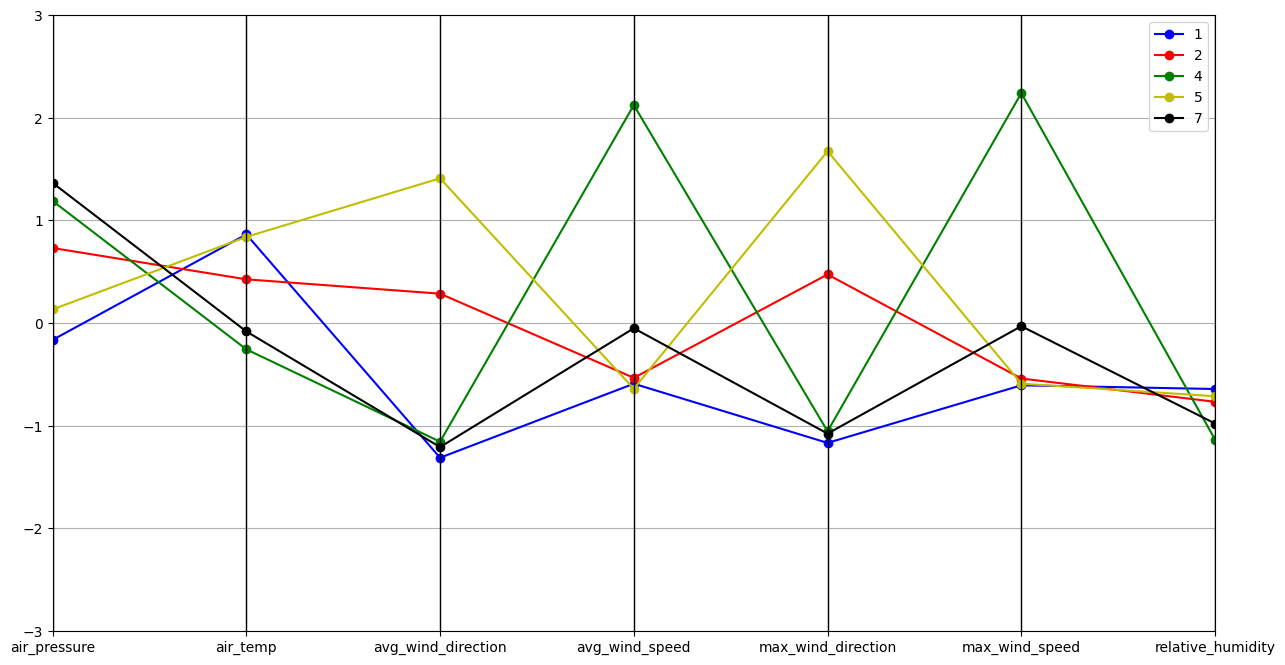

In [89]:
parallel_plot(P[P['relative_humidity'] < -0.5])

# Warm Days

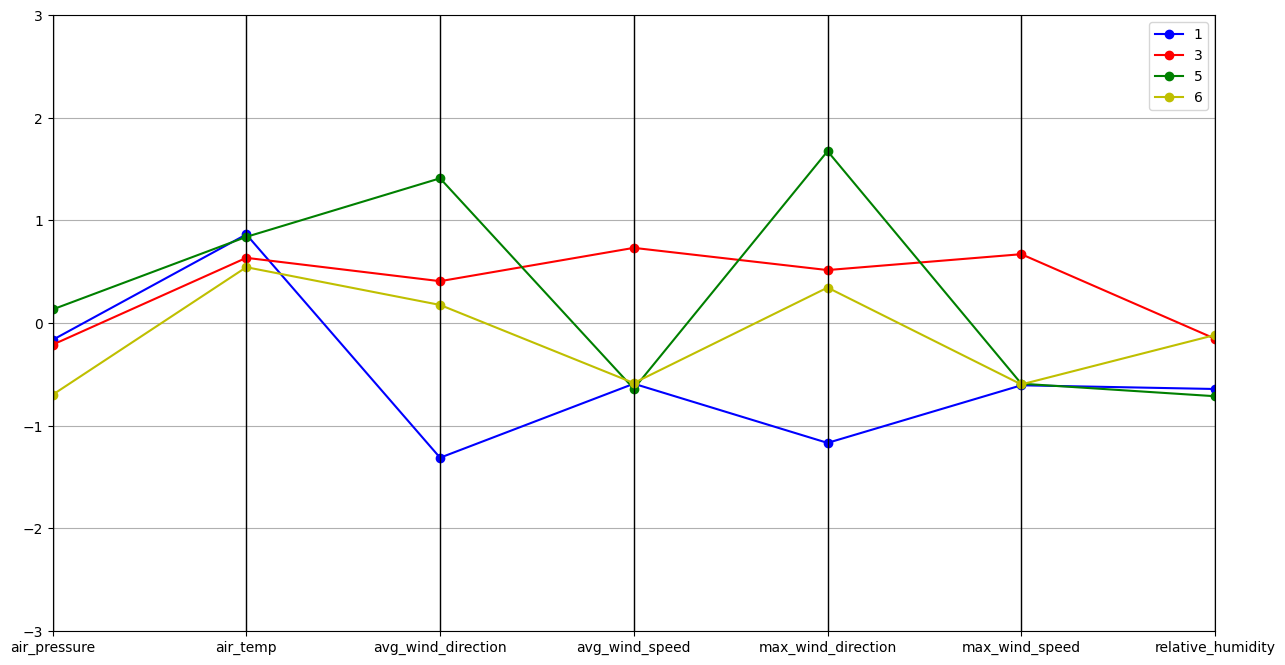

In [90]:
parallel_plot(P[P['air_temp'] > 0.5])

# Cool Days

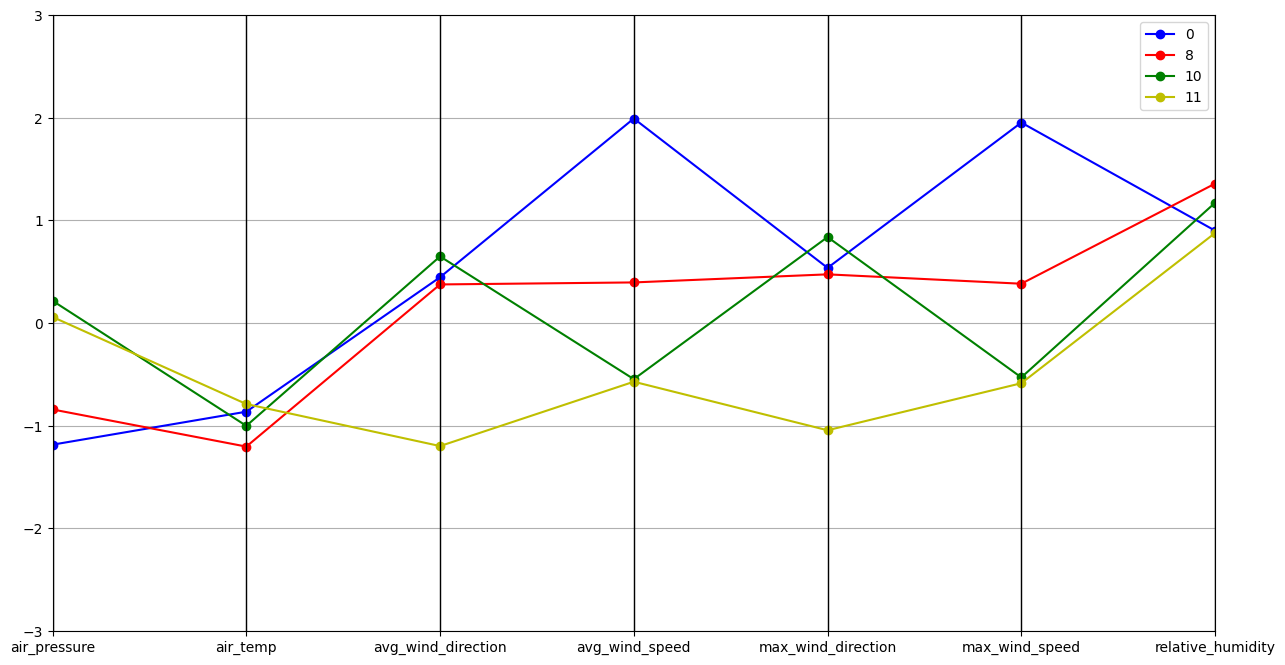

In [91]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])